# Predicting Bike Rentals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score
%matplotlib inline

## Exploring the Data Set

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


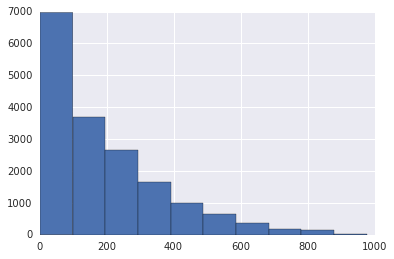

In [4]:
bike_rentals['cnt'].hist()

In [5]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [6]:
# Converting the hours in intervals
def assign_label(number):
    if 6 <= number < 12:
        return 1
    elif 12 <= number < 18:
        return 2
    elif 18 <= number < 24:
        return 3
    else:
        return 4
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4


## Error Metric

The mean squared error (MSE) metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [7]:
# Shuffling the data set
np.random.seed(123)
shuffled_index = np.random.permutation(bike_rentals.index)
bike_shuffled = bike_rentals.reindex(shuffled_index)
# Splitting into training set (80%) and test set (20%)
train_max_row = math.floor(bike_shuffled.shape[0] * .8)
train = bike_shuffled.iloc[:train_max_row, :]
test = bike_shuffled.iloc[train_max_row:, :]

print(train.shape, test.shape)

(13903, 18) (3476, 18)


In [8]:
train.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
5792,5793,2011-09-03,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,147,148,295,3
7823,7824,2011-11-27,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,113,200,313,2
15426,15427,2012-10-09,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,8,76,84,3


In [9]:
test.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
7224,7225,2011-11-02,4,0,11,15,0,3,1,1,0.48,0.4697,0.51,0.1642,26,161,187,2
6001,6002,2011-09-12,3,0,9,15,0,1,1,1,0.74,0.6667,0.48,0.0896,60,152,212,2
4389,4390,2011-07-06,3,0,7,19,0,3,1,1,0.74,0.6970,0.70,0.2239,71,323,394,3


## Feature Selection

We'll drop some columns from data set that won't be useful for the predictions. Below there is the list of them and the reason why we removed it:

- `casual` and `registered`: Our target derived from both of them
- `cnt`: this is our target
- `instant`: it's just a row identifier, no reason to be in our model
- `atemp`: since this represents the feeling temperature, it is highly correlated with `temp` column
- `holiday`/`workingday`/`weekday`: due to the very low correlation to the target column.
- `dteday`: this is already splitted into other columns
- `hr`: since we created a column (`time_label`) to represent its intervals
- `season`: it's highly correlated with `mnth`column

## Linear Regression

In [10]:
features = train.columns
features = features.drop(['casual', 'registered', 'cnt', 'instant', 'atemp', 
               'holiday', 'workingday', 'weekday', 'dteday', 'hr', 'season'])
features
target = 'cnt'

In [11]:
lr = LinearRegression()
lr.fit(train[features], train[target])

train_pred = lr.predict(train[features])
train_mse = mean_squared_error(train[target], train_pred)
train_rmse = np.sqrt(train_mse)
train_r2score = r2_score(train[target], train_pred)

test_pred = lr.predict(test[features])
test_mse = mean_squared_error(test[target], test_pred)
test_rmse = np.sqrt(test_mse)
test_r2score = r2_score(test[target], test_pred)

print("TRAIN ERRORS:")
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R2 SCORE:", train_r2score)
print("-"*20)
print("TEST ERRORS:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 SCORE:", test_r2score)

TRAIN ERRORS:
MSE: 19376.61666726086
RMSE: 139.19991618984855
R2 SCORE: 0.40921939214837644
--------------------
TEST ERRORS:
MSE: 20073.2105923409
RMSE: 141.67995832982484
R2 SCORE: 0.3970385375996174


## Decision Trees

In [12]:
dt = DecisionTreeRegressor(random_state=1)
dt.fit(train[features], train['cnt'])
predictions = dt.predict(test[features])
mse = mean_squared_error(test['cnt'], predictions)
mse

25239.613862118014

### Tweaking Parameters

In [13]:
min_samp_leaf = [1, 3, 5, 10, 15, 20]
max_depth = [3, 5, 7, 10, 15]
for i in min_samp_leaf:
    dt = DecisionTreeRegressor(min_samples_leaf=i, random_state=1)
    dt.fit(train[features], train['cnt'])
    predictions = dt.predict(test[features])
    mse = mean_squared_error(test['cnt'], predictions)
    print(mse)

25239.613862118014
19491.257473478698
18160.100011476676
16258.419242138136
15483.267538606375
15198.226095802289


In [14]:
for j in max_depth:
    dt = DecisionTreeRegressor(max_depth=j, random_state=1)
    dt.fit(train[features], train['cnt'])
    predictions = dt.predict(test[features])
    mse = mean_squared_error(test['cnt'], predictions)
    print(mse)

18297.68196508648
15602.148099281001
14917.195035011897
15498.500527942419
20769.675093896636


In [15]:
# Combining the best parameters from the loops above
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, random_state=1)
dt.fit(train[features], train['cnt'])
predictions = dt.predict(test[features])
mse = mean_squared_error(test['cnt'], predictions)
print(mse)

15602.148099281001


## Random Forest

In [16]:
rf = RandomForestRegressor(random_state=1)
rf.fit(train[features], train['cnt'])
predictions = dt.predict(test[features])
mse = mean_squared_error(test['cnt'], predictions)
mse

15602.148099281001